# WGU D208 TASK 1 REV 8 - MATTINSON

<div class="title">
    Multiple Regression Using Churn Data<br>
    Mike Mattinson<br>
    Master of Science, Data Analytics, WGU.edu<br>
    D208: Predictive Modeling<br>
    Dr. Keiona Middleton<br>
    September 21, 2021<br>
</div>

<div class="impact" data-hdr="Abstract">This paper provides the results of a multiple regression analysis conducted on a customer dataset in partial fulfillment of WGU’s D208 Predictive Analysis class requirements. The dataset represents 10,000 rows of customer data for a typical services company. There are fifty (50) attributes for each customer. The provided dataset was mostly clean and ready to use, however, some few additional data cleaning steps were completed prior to running the predictive analysis. The predictive analysis includes both an initial model using all the predictor variables and a final model using a reduced set of predictor variables. The final model includes both numerical and categorical predictor variables. P-values and multi-collinearity were used to select the features used in the final model. The principal research question “how to predict customer monthly charge with high confidence using as few predictor variables as possible” was determined (R-squared = 94.8%) using fifteen (15) of the original attributes. The analysis was conducted in a Python environment using a Jupyter notebook. The Jupyter notebook includes both code and discussion of the analysis. Key words: Churn. Regression. Linear Regression. Multiple Regression. Primary data set: clean_churn.csv, the initial set has 10,000 records with 50 attributes.</div>

<div class="impact" data-hdr="Custom Styles">In order for custom styles to be applied to this notebook, a file called "d208.css" is created within the styles subfolder of the Python project. I am including the contents of that file here for reference, it will be visible in the .ipynb file as well as the .pdf file:</div>

In [1]:
# Styling notebook with custom css
import os
s = os.path.join('styles','d208.css')
print('custom styles are found in {}'.format(s))
from IPython.core.display import HTML
HTML(open(s, "r").read())

custom styles are found in styles\d208.css


<div class="part">Research Question</div>

<h2 data-nbr="A1">Research Question</h2>

<div class="impact" data-hdr="Primary Research Question">
    A typical services company’s revenue is maximized based on the total number of customers and how much each of those customers pay for those services. If the company charges too much, then the customer may stop the service, this is known as churn. If the company charges too little, then it will not maximize its revenue. This analysis will attempt to predict a customer’s monthly payment (dependent variable is ‘MonthlyCharge’) using multiple regression with high degree of accuracy (R-squared >= 95%) based on a minimum set of predictor variables. The final set of predictor variables should include both numeric (e.g., Tenure, Child, and Income, etc.) and categorical data (e.g., Techie, Gender, and Internet Service type, etc.).
    </div>

<h2 data-nbr="A2">Objectives and Goals</h2>

<div class="impact" data-hdr="Data Preparation">Data Preparation objectives are addressed in Part III below and include the following:</div>
<ul class="a">
    <li>Convert categorical data.
    <li>Mitigate missing data.
    <li>Select data required for the analysis.
    <li>Remove data deemed unneccesary.
    <li>Explore data.
    <li>Visualize data.
    <li>Provide copy of final data.
</ul>


<div class="impact" data-hdr="Model Analysis">Model Analysis objectives are addressed in Part IV below and include the following:</div>
<ul class="a">
    <li>Eliminate predictor variables with high p-values.
    <li>Eliminate predictor variables with high degree of multicollinearity.
    <li>Create initial model using all the data.
    <li>Refine model using a reduced set of the data.
    <li>Summarize results.  
    <li>Ensure independent and dependent variables are linear.  
    <li>Ensure independent variables are not highly collinear
    <li>Ensure final model residuals are normally distributed.  
</ul>


<div class="part">
    Method Justification
</div>

<div class="quote"><div class="impact" data-hdr="B">Describe multiple regression methods by doing the following:</div></div>

<h2 data-nbr="B1">
    Assumptions
</h2>

<div class="quote"><div class="impact" data-hdr="1">Summarize the assumptions of a multiple regression model.</div></div>

<div class="impact" data-hdr="Assumptions">The multiple regression analysis is based on the following assumptions:</div>
<ul class="a">
    <li><b>Linear Relationship</b>. Linear relationship between dependent and independent variables.
    <li><b>Multivariate Normality</b>. Residuals are normally distributed.
    <li><b>Multicollinearity</b>. The independent or predictor variables are not highly correlated with each other.
</ul>


<h2 data-nbr="B2">
    Benefits of Python
</h2>

<div class="quote"><div class="impact" data-hdr="2">Describe the benefits of using the tool(s) you have chosen (i.e., Python, R, or both) in support of various phases of the analysis.</div></div>

<div class="impact" data-hdr="Python-Jupyter">The analysis is completed by executing Python code inside of a Jupyter notebook. Python is installed within VS Code IDE. VS Code is used to manage the overall environment and Jupyter notebook is used to execute Python code and discuss and highlight the analysis process. Within the Python project, a virtual environment is set up to include the packages and configurations unique to this assignment. </div>
    
Here are the versions of Python and VS Code:<br>
<ul class="a">
    <li>Python 3.9.6
    <li>VS Code 1.60.0
</ul>

<div class="impact" data-hdr="Benefits">Using Python has the following benefits:</div>
<ul class="a">
    <li>Ease of use
    <li>Availability of required statistical and modeling packages
    <li>User friendly Jupyter notebook allows segmented code execution and ability to include additional markup with the code.
    <li>Able to use custom .css styles to format html output
</ul>

In [2]:
# show python environment
import sys
print(sys.version)
print(sys.executable)

3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]
p:\code_wgu\5\v\scripts\python.exe


Note. It is possible to list all of the currently installed Python packages using [>pip list] from the terminal in the VS Code IDE. Here is an example of that output:<br>
<b>Package           Version</b><br>
======================<br>
backcall          0.2.0<br>
colorama          0.4.4<br>
cycler            0.10.0<br>
debugpy           1.4.3<br>
decorator         5.1.0<br>
entrypoints       0.3<br>
ipykernel         6.4.1<br>
ipython           7.27.0<br>
ipython-genutils  0.2.0<br>
jedi              0.18.0<br>
joblib            1.0.1<br>
jupyter-client    7.0.2<br>
jupyter-core      4.7.1<br>
kiwisolver        1.3.2<br>
matplotlib        3.4.3<br>
matplotlib-inline 0.1.3<br>
...


<h2 data-nbr="B3"> Why Multiple Regression is Appropriate</h2>

<div class="quote"><div class="impact" data-hdr="3">Explain why multiple regression is an appropriate technique to analyze the research question summarized in Part I.</div></div>

<div class="impact" data-hdr="Why">
    Multiple regression is “the most common” tool for conducting regression analysis. According to Petchko (2018), multiple regression allows the researcher to asses the strength of the relationship between the dependent and several predictor variables as well as to determine the importance of each predictor to the relationship.
    </div>

<div class="part">Exploratory Data Analysis</div>

<h2 data-nbr="C1">Describe Data Analysis Prep and Explore</h2>

<div class="quote"><div class="impact" data-hdr="1">Describe your data preparation goals and the data manipulations that will be used to achieve the goals.</div></div>

<div class="impact" data-hdr="Select Data">From the original data, determine which attributes fit the best for the primary research question. Load the data from the provided .csv file as a pandas dataframe.</div>

<div class="impact" data-hdr="Mitigate Missing Data">Look through data for missing rows or columns. Also, look for Null or NaN values. If found, decide how best to mitigate the issue.</div>

<div class="impact" data-hdr="Remove Data">Once data is determined not to be of value to the analysis, use the pandas .drop() method to remove the data.</div>

<div class="impact" data-hdr="Convert Categorical Data">In order to use categorical data in the regression model, each variable must be converted into numeric dummy data. I will use pandas .get_dummies() method. This will generate new numeric variables based on the unique values and this will also remove the original attribute.</div>

<div class="impact" data-hdr="Explore Data">Explore customer data by calculating traditional statistics. Look for patterns and relationships between attributes. If possible, create visualizations to add in the exploratory process.</div>

<div class="impact" data-hdr="Visualize Data">Continue to explore data and their relationships using histogram, countplots, barplots and scatter plot diagrams. Use matplotlib and sns packages to generate these univariate and bivariate diagrams.</div>

<h2 data-nbr="C2-C4">Prepare and Explore Data</h2>

<div class="quote"><div class="impact" data-hdr="2-4">2. Discuss the summary statistics, including the target variable and all predictor variables that you will need to gather from the data set to answer the research question.
3.  Explain the steps used to prepare the data for the analysis, including the annotated code.
4.  Generate univariate and bivariate visualizations of the distributions of variables in the cleaned data set. Include the target variable in your bivariate visualizations.
</div></div>

<div class="impact" data-hdr="Imports">Before going further, let's import Python libraries that will be used throughout the notebook. In addition to standard plotting and modeling packages, I have created a few custom helper functions which are imported towards the end.</div>

In [3]:
# imports
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display

<div class="impact" data-hdr="Helper Functions">Here are helper functions that will be used thoughout the notebook.</div>

In [4]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def custom_corr_matrix(df, title):
    fig = plt.figure(figsize=(30, 30))
    sns.set(font_scale=1.0)
    sns.heatmap(data=df.corr().round(1), annot=True,annot_kws={'size':30})
    print(get_top_abs_correlations(df))
    plt.savefig('output/' + COURSE + '/fig_corr_matrix_' + title + '.png', facecolor='w') 

<div class="impact" data-hdr="Constants">Here are a couple of global variables that will be reused thoughout the notebook.</div>

In [5]:
# constants
COURSE = 'd208' # name of course to be added to filename of generated figures and tables.
target = 'MonthlyCharge' # this is the column name of the primary research column

<div class="impact" data-hdr="Select Data">The customer dataset as a .csv file is loaded into Python as a Pandas dataframe using the .read_csv() method. After the dataframe is created, I use the df.shape function to show number of rows and columns. To begin the analysis, I have selected to load all of the data from the .csv file.</div>

In [6]:
# read csv file
import os
df = pd.read_csv(os.path.join('data','churn_clean.csv'), header=0)
df.shape

(10000, 50)

There are 10,000 customer records with fifty (50) attributes for each customer.

<div class="impact" data-hdr="Mitigate Missing Data">Use .info() and .isna().any() methods to view a summary of possible missing data. I do not expect to find any missing data as the dataset provided has already been cleaned.</div>

In [7]:
# explore missing data
missing = df[df.columns[df.isna().any()]].columns
df_missing = df[missing]
print(df_missing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Empty DataFrameNone


Analysis of the raw data shows no missing data, each attribute has 10,000 non-null values. 

<div class="impact" data-hdr="Duplicate Data">Look for duplicate data in rows and columns. This dataset had been provided to this assignment in a very clean, ready state, so I don't expect to find anything here.</div>

In [8]:
# look for duplicate data - looking for zero rows
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8


In [9]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

False

In [10]:
# check if any rows are duplicated - looing for False
df.duplicated().any()

False

<div class="impact" data-hdr="Remove Data">Identify columns that are not needed for the analysis and then use the .drop() methode to remove the data. Looking at the data, I select some of the demographic data, customer identification data and the survey data to be removed.</div>

In [11]:
# drop unwanted data
cols_to_be_removed = ['City','County','Zip','Job','TimeZone', 'State', 'Churn', 
            'Lat', 'Lng', 'UID', 'Customer_id','Interaction', 'CaseOrder',
            'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']

# print list of dropped data
print('data to be removed: {}'.format(cols_to_be_removed))

# loop through list, if in current df, drop col
for c in cols_to_be_removed:
    if c in df.columns:
        df.drop(columns = c, inplace=True)
        print('Data named [{}] has been removed.'.format(c))

data to be removed: ['City', 'County', 'Zip', 'Job', 'TimeZone', 'State', 'Churn', 'Lat', 'Lng', 'UID', 'Customer_id', 'Interaction', 'CaseOrder', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
Data named [City] has been removed.
Data named [County] has been removed.
Data named [Zip] has been removed.
Data named [Job] has been removed.
Data named [TimeZone] has been removed.
Data named [State] has been removed.
Data named [Churn] has been removed.
Data named [Lat] has been removed.
Data named [Lng] has been removed.
Data named [UID] has been removed.
Data named [Customer_id] has been removed.
Data named [Interaction] has been removed.
Data named [CaseOrder] has been removed.
Data named [Item1] has been removed.
Data named [Item2] has been removed.
Data named [Item3] has been removed.
Data named [Item4] has been removed.
Data named [Item5] has been removed.
Data named [Item6] has been removed.
Data named [Item7] has been removed.
Data named [Item8] has been remo

<div class="impact" data-hdr="Explore Data - Independent Variables">
    Excluding target data, here is the final list of predictor variables. For quick reference, numerical data includes brief traditional statistic data, and categorical data includes a list of unique values:
    </div>

<div class="impact" data-hdr="Note">
    Independent variables are sometimes called by different names, they are synonymous, they can be referred to as independent variables, predictor variables, input variables and sometimes, as features.
    </div>

In [12]:
# print out input variables
for c in df.loc[:, df.columns != target]:
    if df.dtypes[c] == "object":
        print('\n{} is categorical: {}.'.format(c,df[c].unique()))
    else:
        print('\n{} is numerical:'.format(c ))
        print('\trange = {} - {}'.format(df[c].min(),df[c].max()))
        print('\tmean = {:.2f} +/- {:.2f}'.format(df[c].mean(), df[c].std()))


Population is numerical:
	range = 0 - 111850
	mean = 9756.56 +/- 14432.70

Area is categorical: ['Urban' 'Suburban' 'Rural'].

Children is numerical:
	range = 0 - 10
	mean = 2.09 +/- 2.15

Age is numerical:
	range = 18 - 89
	mean = 53.08 +/- 20.70

Income is numerical:
	range = 348.67 - 258900.7
	mean = 39806.93 +/- 28199.92

Marital is categorical: ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced'].

Gender is categorical: ['Male' 'Female' 'Nonbinary'].

Outage_sec_perweek is numerical:
	range = 0.09974694 - 21.20723
	mean = 10.00 +/- 2.98

Email is numerical:
	range = 1 - 23
	mean = 12.02 +/- 3.03

Contacts is numerical:
	range = 0 - 7
	mean = 0.99 +/- 0.99

Yearly_equip_failure is numerical:
	range = 0 - 6
	mean = 0.40 +/- 0.64

Techie is categorical: ['No' 'Yes'].

Contract is categorical: ['One year' 'Month-to-month' 'Two Year'].

Port_modem is categorical: ['Yes' 'No'].

Tablet is categorical: ['Yes' 'No'].

InternetService is categorical: ['Fiber Optic' 'DSL' 'None'].

<div class="impact" data-hdr="Numeric vs Cateogrical Data">The analysis will use the following variables to separate the numeric and categorical data.</div>

In [13]:
# variable for numeric data
num_cols = df.select_dtypes(include="number").columns
print(num_cols)

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')


In [14]:
# variable for categorical data
cat_cols = df.select_dtypes(include="object").columns
print(cat_cols)

Index(['Area', 'Marital', 'Gender', 'Techie', 'Contract', 'Port_modem',
       'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


<div class="impact" data-hdr="Explore Categorical Data">
    Prior to converting the categorical data for use in the model, as part of exploratory data analysis, I will visualize the original categorical data using a countplot. In a moment, the categorical data will be converted to dummy data and I will lose the original data.
  </div>

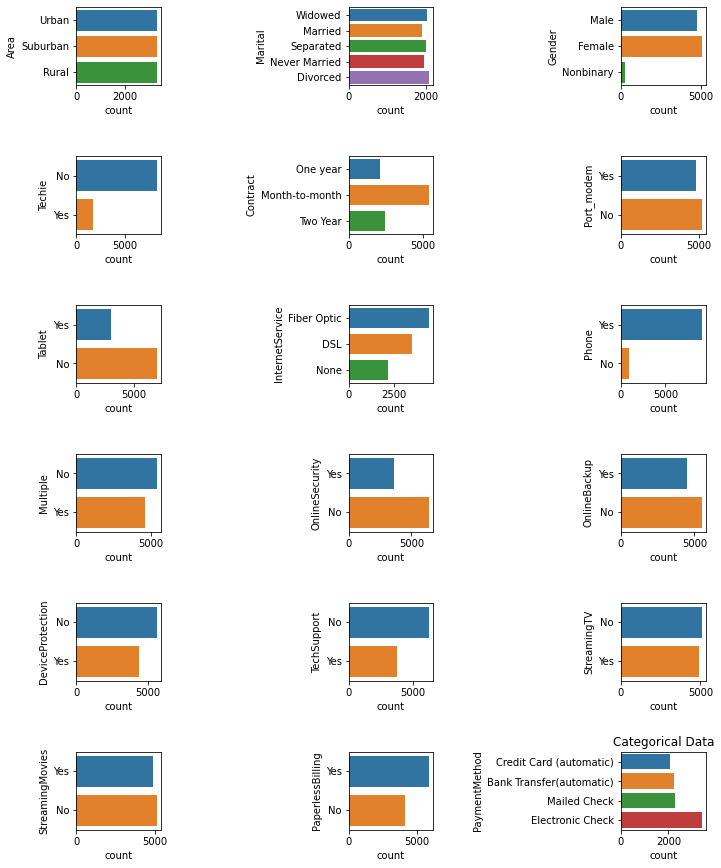

In [15]:
# plot categorical data - before it gets converted
fig = plt.figure(figsize=(10, 20))

for i, col in enumerate(cat_cols):
    plt.subplot(10, 3, i+1)
    ax = sns.countplot(y=col, data=df)
    fig.tight_layout(h_pad=4, w_pad=4)

plt.title('Categorical Data')
plt.savefig('output/' + COURSE + '/fig_countplot_categorical.png')
plt.show()

<div class="impact" data-hdr="Convert Categorical Data">
    The regression model requires all of the independent variables to be numeric. Because there are many categorical data, each will have to be converted into numeric data. The data is converted into dummy numeric data using the pandas .get_dummies() method. After the conversion, the original data is removed.
    </div>

<div class="impact" data-hdr="Note">
    The method uses the option 'drop_first=True'. Most of the categorical data has two or more unique values. When using this option, the .get_dummies() method will remove the first unique value, which is good, because of the multi-collinear nature of this operation. It can be a problem, however, if the data that is removed is data that is necessary. For the purpose of this analysis, I am using the 'drop_first' option, but future analysis may decide to use the other data. I am creating a variable called 'contract' with a snapshot of the contract data before the conversion in order to present an example of this potential problem.
    </div>

In [16]:
# in a moment, I will generate a scatter plot of this data
contract = df[['MonthlyCharge','Contract']] # keep this for a future calculation

In [17]:
# convert categorical data
for c in cat_cols:
    if c in df.columns:
        df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
        print(df.select_dtypes(include="uint8").columns)

Index(['Area_Suburban', 'Area_Urban', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'],
      dtype='object')


<div class="impact" data-hdr="Explore Target Data">
    For this task, <b>MonthlyCharge</b> is the target (or dependent) variable. It is numeric data. The purpose of this regression model is to find the best set of predictor (independent) variables that can be used to predict a customer’s <b>MonthlyCharge</b> to a high degree of accuracy. Target data will be described and visualized. To describe the numeric data, traditional statistics will be included with the boxplot. 
    </div>
<ul class="a">
    <li><b>MonthlyCharge</b>. The amount charged to the customer monthly. This value reflects an average per customer. Here is a plot and description of the MonthlyCharge data:<br>
</ul>

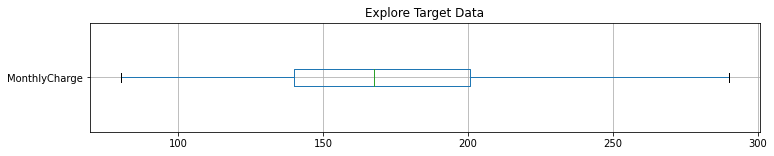

count    10000.000
mean       172.625
std         42.943
min         79.979
25%        139.979
50%        167.485
75%        200.735
max        290.160
Name: MonthlyCharge, dtype: float64


In [18]:
# explore target data
plt.figure(figsize=(12, 2))
ax = df.boxplot([target], vert=False)
plt.title('Explore Target Data')
plt.savefig('output/' + COURSE + '/fig_boxplot_target.png', facecolor='w')
plt.show()
print(df[target].describe().round(3))

<div class="impact" data-hdr="Explore Numeric Predictor Data">
    In addition to the categorical data shown above, the following numerical data will be included as independent variables in the analysis. Each numeric variable will be ploted using a boxplot. The data is standardized for the purpose of the boxplot. The data below the figure shows the traditional statistics of the non-standardized data. After the boxplots, I will also generate historam plots of the same data.
    </div>

Numerical data:<br>
<ul class="a">
    <li><b>Children</b>: Number of children in customer’s household as reported in sign up information
    <li><b>Age</b>: Age of customer as reported in sign up information
    <li><b>Income</b>: Annual income of cu stomer as reported at time of sign up
    <li><b>Outage_sec_perweek</b>: Average number of seconds per week of system outage s in the customer’s neighborhood
    <li><b>Email</b>: Number of emails sent to the customer in the last year (marketing or correspondence)
    <li><b>Contacts</b>: Number of times customer contacted technical support
    <li><b>Population</b>: Population within a mile radius of customer, based on census data
    <li><b>Yearly_equip_failure</b>: The number of times customer’s equipment failed and had to be reset/replaced in the past year
    <li><b>Tenure</b>: Number of months the customer has stayed with the provider
    <li><b>Bandwidth_GB_Year</b>: The average amount of data used, in GB, in a year by the customer
</ul>

<div class="impact" data-hdr="Univariate Boxplot of Numeric Predictor Data">Here are the box plots. </div>

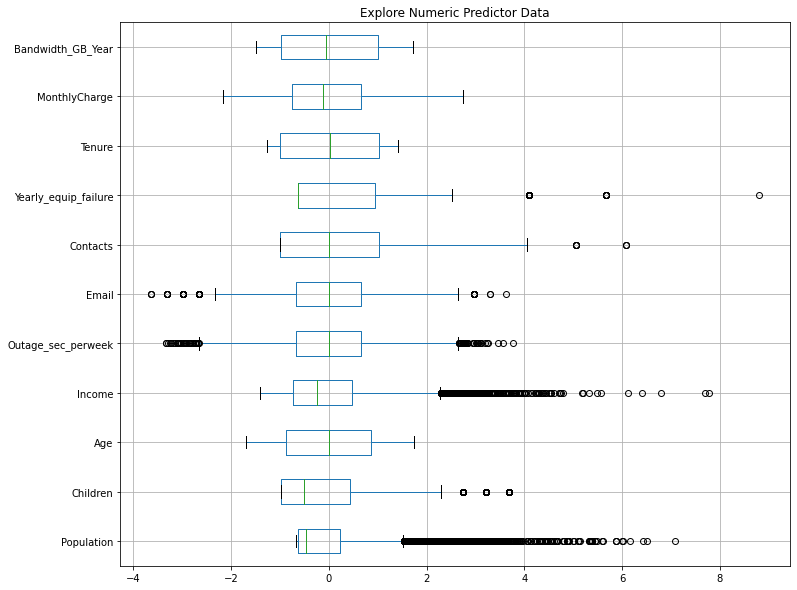

                        count       mean        std      min        25%  \
Population            10000.0   9756.562  14432.699    0.000    738.000   
Children              10000.0      2.088      2.147    0.000      0.000   
Age                   10000.0     53.078     20.699   18.000     35.000   
Income                10000.0  39806.927  28199.917  348.670  19224.718   
Outage_sec_perweek    10000.0     10.002      2.976    0.100      8.018   
Email                 10000.0     12.016      3.026    1.000     10.000   
Contacts              10000.0      0.994      0.988    0.000      0.000   
Yearly_equip_failure  10000.0      0.398      0.636    0.000      0.000   
Tenure                10000.0     34.526     26.443    1.000      7.918   
MonthlyCharge         10000.0    172.625     42.943   79.979    139.979   
Bandwidth_GB_Year     10000.0   3392.342   2185.295  155.507   1236.471   

                            50%        75%         max  
Population             2910.500  13168.000

In [19]:
# explore numeric predictor data
plt.figure(figsize=(12, 10))
std_numeric_data = (df[num_cols] -df[num_cols].mean()) / df[num_cols].std()
ax = std_numeric_data.boxplot(vert=False)
plt.title('Explore Numeric Predictor Data')
plt.savefig('output/' + COURSE + '/fig_boxplot_numeric.png', facecolor='w')
plt.show()
#print(std_numeric_data.describe(percentiles=None).round(3).T)
print(df[num_cols].describe(percentiles=None).round(3).T)

<div class="impact" data-hdr="Univariate Histogram Plot of Numeric Predictor Data">Here are the histogram plots for numeric data.</div>

<Figure size 720x1440 with 0 Axes>

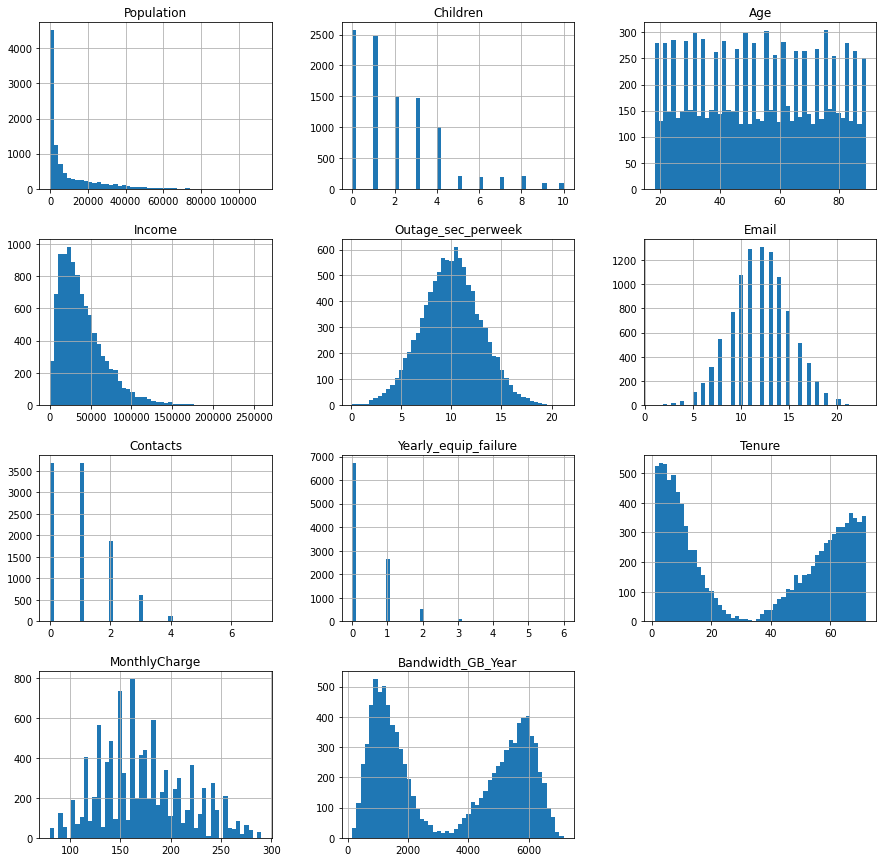

In [20]:
# histogram plot numeric data
fig = plt.figure(figsize=(10, 20))
ax = df[num_cols].hist(bins = 50, figsize=(15,15))
plt.title('Numeric Data')
fig.tight_layout(h_pad=5, w_pad=5)
plt.savefig('output/' + COURSE + '/fig_hist_numeric.png', facecolor='w')
plt.show()

Survey data, not to be used for this analysis:<br>
<ul class="a">
    <li><b>Item1</b>: Timely response
    <li><b>Item2</b>: Timely fixes
    <li><b>Item3</b>: Timely replacements
    <li><b>Item4</b>: Reliability
    <li><b>Item5</b>: Options
    <li><b>Item6</b>: Respectful response
    <li><b>Item7</b>: Courteous exchange
    <li><b>Item8</b>: Evidence of active listening
</ul>

<div class="impact" data-hdr="Bivariate Scatter Plot of Numeric Predictor Data">Here are the scatter plots of selected numeric data vs. the target variable of 'MonthlyCharge'. One of the assumptions is that independent and dependent variables are linear, so I am looking for linear relationships here.</div>

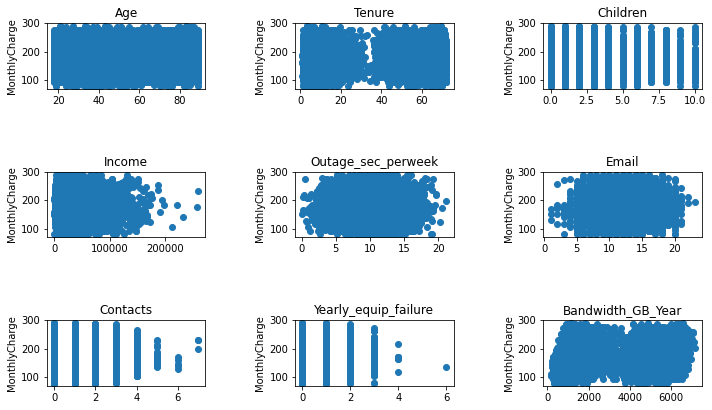

In [21]:
# scatter plot of selected features
fig = plt.figure(figsize=(10, 20))
features = ['Age','Tenure','Children','Income',
            'Outage_sec_perweek','Email','Contacts',
            'Yearly_equip_failure','Bandwidth_GB_Year']
target = df['MonthlyCharge']

for i, col in enumerate(features):
    plt.subplot(10, 3, i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    #plt.xlabel(col)
    plt.ylabel('MonthlyCharge')
    fig.tight_layout(h_pad=5, w_pad=5)
    
plt.savefig('output/' + COURSE + '/fig_scatterplot_selected.png', facecolor='w')


None of these indicate linear relationships. Use this information when selecting features to include in the model.

<div class="impact" data-hdr="Bivariate Scatter Plot of Predictor Pairs">Here is a pair plot between each predictor variable and the others. Two (2) potential predictor variables should not have a linear relationship. If linear, then I will not use both together in the regression model. I am using the seaborn .pairplot() to scatter plot each pair of predictor variables. </div>

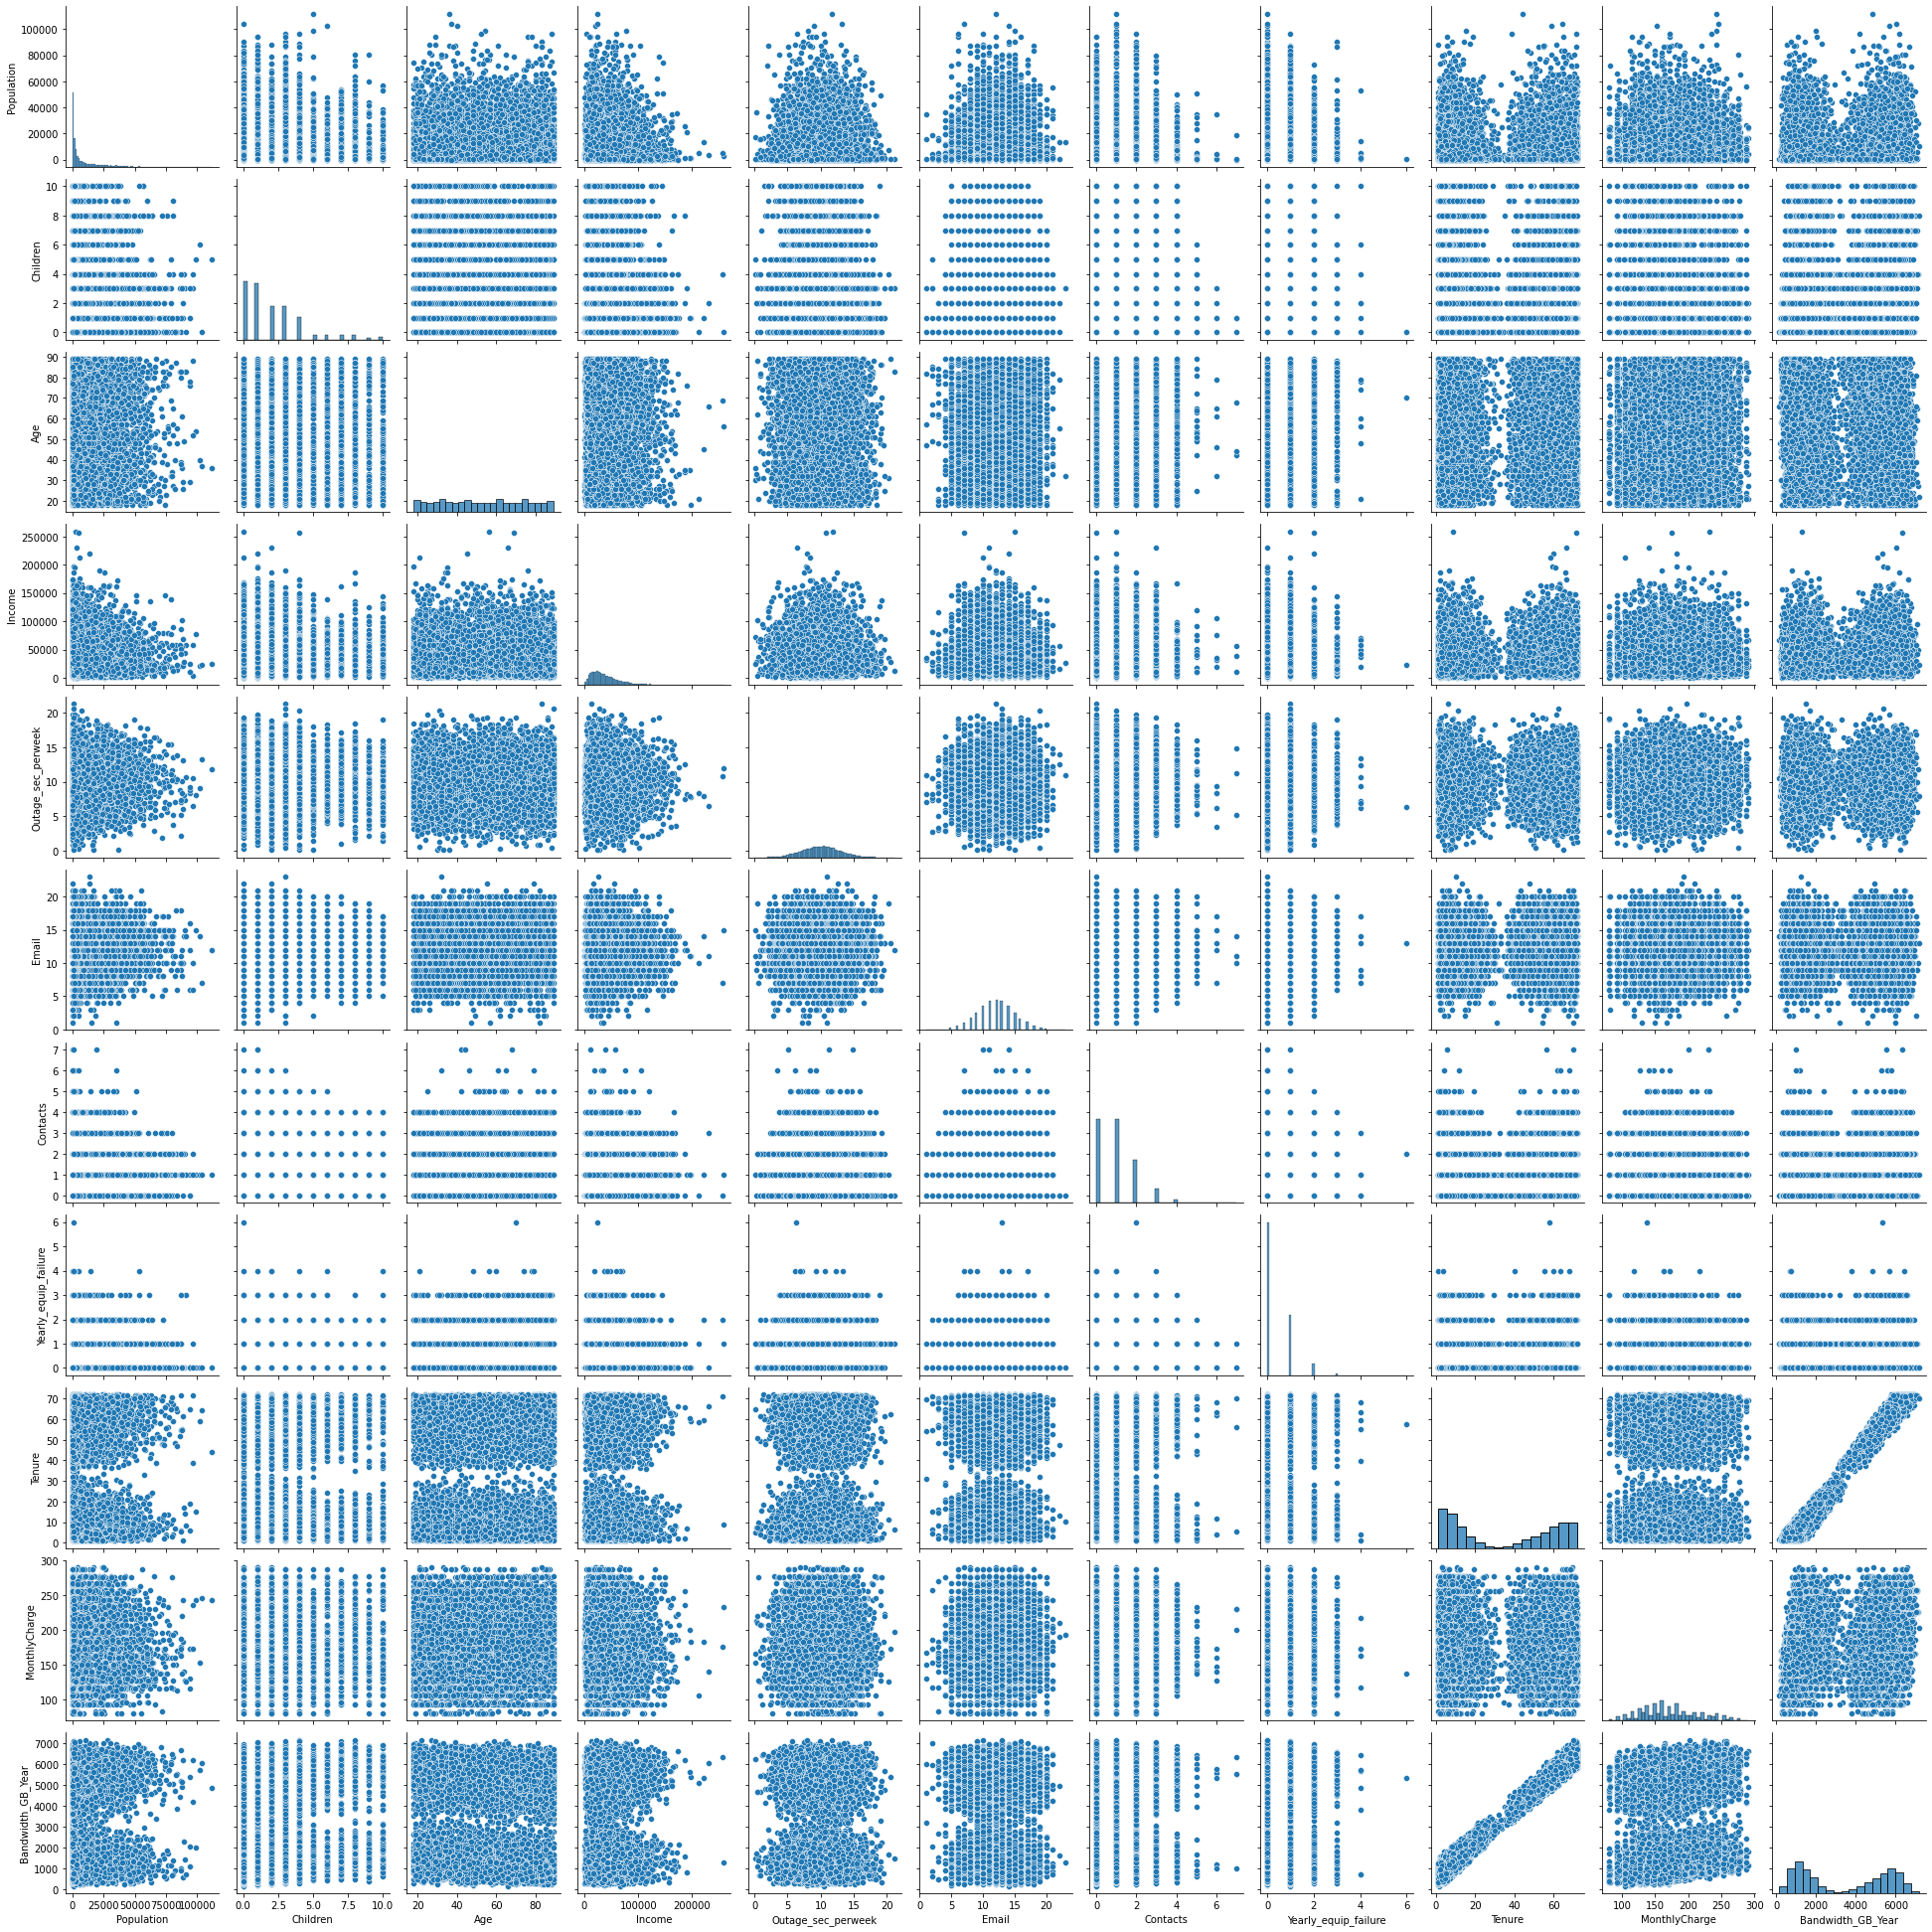

In [22]:
# create data visualizations
ax = sns.pairplot(df[num_cols])
plt.show()

There is a linear relationship between <b>Tenure</b> and <b>Bandwidth_GB_Year</b> indicating multicollinearity. Ensure both variables are not selected together in the regression models. All of the other pairs look ok.

<div class="impact" data-hdr="Bivariate Bar Plot - Contract Data">Here is the example where the .drop_first() method doesn't select the best unique value when converting dummy data. The plot shows the number of contracts by type of contract where the customer had above averate monthly charge.</div>

Mean of MonthlyCharge: $172.62
Contract
Month-to-month    2609
One year          1017
Two Year          1141
Name: MonthlyCharge, dtype: int64


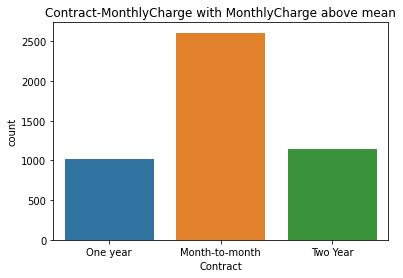

In [23]:
# bar plot contract-monthlycharge 
c = 'Contract'
mean = contract['MonthlyCharge'].mean()
print('Mean of MonthlyCharge: ${:.2f}'.format(mean))
temp_df = contract.query('MonthlyCharge>=172')
sns.countplot(x=c, data=temp_df)
plt.title('Contract-MonthlyCharge with MonthlyCharge above mean')
print(temp_df.groupby("Contract")["MonthlyCharge"].count())
plt.savefig('output/' + COURSE + '/fig_barplot_contracts.png', facecolor='w')
plt.show()

Notice there is a higher number of customers with Month-to-month contracts where the <b>MonthlyCharge</b> is at or above the mean. This may be an area to consider in a future analysis.

<h2 data-nbr="C5">Provide Copy of Final Data</h2>

In [24]:
# Provide copy of the prepared data set.
final_data = 'd208_final_data.csv'
df.to_csv(final_data, index=False, header=True)
print('File saved to: {}'.format(final_data))
print(df.columns.to_series().groupby(df.dtypes).groups)

File saved to: d208_final_data.csv
{uint8: ['Area_Suburban', 'Area_Urban', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check'], int64: ['Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure'], float64: ['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']}


<div class="part">Model Comparison and Analysis</div>

<div class="quote"><div class="impact" data-hdr="D">Compare an initial and a reduced multiple regression model by doing the following:</div></div>

<h2 data-nbr="D1">Initial Model</h2>

<div class="quote"><div class="impact" data-hdr="1">Construct an initial multiple regression model from all predictors that were identified in Part C2.</div></div>

<div class="impact" data-hdr="Initial Model">Here is the first model using all available predictor variables. I will use all of the available numeric and dummy categorical data for the initial model. However, based on "common sense", I believe that the models will eliminate all of the variables with the exception of the actual services involved. In other words, I don't believe <b>Age</b> for example, has anything to do with predicting <b>MonthlyCharge</b>. It makes sense that the <b>MonthlyCharge</b> would be a function of the customer's services, more than anything else. I will address this in the final analysis summary to see if my observations here bear any merit.</div>

In [25]:
# initial model
y = df.loc[ : , df.columns == 'MonthlyCharge']
X = df.loc[ : , df.columns != 'MonthlyCharge']
Xc = sm.add_constant(X)
model_1 = sm.OLS(y, Xc).fit()
print(model_1.summary2()) # using alternate summary layout

                             Results: Ordinary least squares
Model:                       OLS                     Adj. R-squared:            0.995     
Dependent Variable:          MonthlyCharge           AIC:                       49597.8789
Date:                        2021-10-21 18:43        BIC:                       49871.8719
No. Observations:            10000                   Log-Likelihood:            -24761.   
Df Model:                    37                      F-statistic:               5.966e+04 
Df Residuals:                9962                    Prob (F-statistic):        0.00      
R-squared:                   0.996                   Scale:                     8.3155    
------------------------------------------------------------------------------------------
                                       Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
------------------------------------------------------------------------------------------
const                        

p:\code_wgu\5\v\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Notice high condition number indicating possible high multicollinearity between predictor variables. Also, many of the predictor p-values are high, above 0.05.

<div class="impact" data-hdr="Coorelation Data">Here is a coorelation matrix and a list of the data-pairs with the highest coorelation.</div>

In [26]:
# find predictor pairs with high coorelation
#custom_corr_matrix(X,'Model_2')
get_top_abs_correlations(X, 10)

Tenure                                 Bandwidth_GB_Year                 0.991495
Area_Suburban                          Area_Urban                        0.500711
InternetService_Fiber Optic            InternetService_None              0.461753
PaymentMethod_Electronic Check         PaymentMethod_Mailed Check        0.390989
PaymentMethod_Credit Card (automatic)  PaymentMethod_Electronic Check    0.367992
Contract_One year                      Contract_Two Year                 0.293243
PaymentMethod_Credit Card (automatic)  PaymentMethod_Mailed Check        0.279547
Marital_Separated                      Marital_Widowed                   0.253210
Marital_Never Married                  Marital_Widowed                   0.248636
                                       Marital_Separated                 0.247636
dtype: float64

The top correlation is between <b>Tenure</b> and <b>Bandwidth_GB_Year</b>. We saw this relationship earlier in the exploratory data analysis section. Based on this high correlation, remove <b>Bandwidth_GB_Year</b> prior to the next model iteration.

<div class="impact" data-hdr="High P-Values">On the high p-values side of the house, I wrote code to loop through the model summary and drop any predictor whose p-value is greater than 0.05. Here is the code:</div>

In [27]:
# drop all columns from model where p-value > 0.05 (see Geeks for Geeks (2021))
equation = model_1.summary2().tables[1]
temp_drop = []
for i in equation.itertuples():
    if i[4] > 0.05:
        temp_drop.append(i[0])
        print('Drop {} with p-value of {:.3f}.'.format(i[0],i[4]))
X = pd.DataFrame(X) # reset dataframe
X.drop(temp_drop, axis = 1, inplace=True) # drop

Drop Population with p-value of 0.354.
Drop Income with p-value of 0.480.
Drop Outage_sec_perweek with p-value of 0.554.
Drop Email with p-value of 0.859.
Drop Contacts with p-value of 0.497.
Drop Yearly_equip_failure with p-value of 0.863.
Drop Area_Urban with p-value of 0.235.
Drop Marital_Married with p-value of 0.885.
Drop Marital_Never Married with p-value of 0.564.
Drop Marital_Separated with p-value of 0.456.
Drop Marital_Widowed with p-value of 0.871.
Drop Techie_Yes with p-value of 0.508.
Drop Contract_One year with p-value of 0.576.
Drop Contract_Two Year with p-value of 0.364.
Drop Port_modem_Yes with p-value of 0.437.
Drop Tablet_Yes with p-value of 0.989.
Drop Phone_Yes with p-value of 0.854.
Drop PaperlessBilling_Yes with p-value of 0.212.
Drop PaymentMethod_Credit Card (automatic) with p-value of 0.761.
Drop PaymentMethod_Electronic Check with p-value of 0.383.


In [28]:
# drop other columns with high multi-collinearity (see Geeks for Geeks (2021))
temp_drop =['Bandwidth_GB_Year', 'Tenure','Children','InternetService_None','Age']
X = pd.DataFrame(X) # reset dataframe
X.drop(temp_drop, axis = 1, inplace=True) # drop

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Area_Suburban                10000 non-null  uint8
 1   Gender_Male                  10000 non-null  uint8
 2   Gender_Nonbinary             10000 non-null  uint8
 3   InternetService_Fiber Optic  10000 non-null  uint8
 4   Multiple_Yes                 10000 non-null  uint8
 5   OnlineSecurity_Yes           10000 non-null  uint8
 6   OnlineBackup_Yes             10000 non-null  uint8
 7   DeviceProtection_Yes         10000 non-null  uint8
 8   TechSupport_Yes              10000 non-null  uint8
 9   StreamingTV_Yes              10000 non-null  uint8
 10  StreamingMovies_Yes          10000 non-null  uint8
 11  PaymentMethod_Mailed Check   10000 non-null  uint8
dtypes: uint8(12)
memory usage: 117.3 KB


<div class="impact" data-hdr="Updated Model">Here is the next iteration of the regression model:</div>

In [30]:
# updated model 
# y is already defined
# X is already defined and reduced
Xc = sm.add_constant(X) # reset 
model_2 = sm.OLS(y, Xc).fit()
print(model_2.summary2()) # using alternate summary layout

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.946     
Dependent Variable:    MonthlyCharge       AIC:                   74366.7372
Date:                  2021-10-21 18:43    BIC:                   74460.4716
No. Observations:      10000               Log-Likelihood:        -37170.   
Df Model:              12                  F-statistic:           1.465e+04 
Df Residuals:          9987                Prob (F-statistic):    0.00      
R-squared:             0.946               Scale:                 99.236    
----------------------------------------------------------------------------
                             Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
const                       78.8953   0.3004 262.6253 0.0000 78.3065 79.4842
Area_Suburban                0.0860   0.2112   0.4072 0.6839 -0.3280  0.5000
Gender_Male           

p:\code_wgu\5\v\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [31]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_2.summary2().tables[0][3][0]))
equation = model_2.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_2.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.946
Estimate [MonthlyCharge] as y = 
   +78.90 x ( const ) 
   +0.09 x ( Area_Suburban ) 
   -0.20 x ( Gender_Male ) 
   -0.91 x ( Gender_Nonbinary ) 
   +24.74 x ( InternetService_Fiber Optic ) 
   +32.80 x ( Multiple_Yes ) 
   +2.80 x ( OnlineSecurity_Yes ) 
   +22.58 x ( OnlineBackup_Yes ) 
   +12.46 x ( DeviceProtection_Yes ) 
   +12.64 x ( TechSupport_Yes ) 
   +42.18 x ( StreamingTV_Yes ) 
   +52.34 x ( StreamingMovies_Yes ) 
   +0.12 x ( PaymentMethod_Mailed Check ) 


<div class="impact" data-hdr="High Coorelation">Use coorelation matrix to find predictor pairs with high coorelation.</div>

In [32]:
# find predictor pairs with high coorelation
#custom_corr_matrix(X,'Model_2')
get_top_abs_correlations(X, 10)

Gender_Male                  Gender_Nonbinary              0.146092
Gender_Nonbinary             OnlineBackup_Yes              0.029316
InternetService_Fiber Optic  TechSupport_Yes               0.026211
Gender_Male                  PaymentMethod_Mailed Check    0.022103
DeviceProtection_Yes         StreamingMovies_Yes           0.019450
Gender_Male                  DeviceProtection_Yes          0.018678
Gender_Nonbinary             DeviceProtection_Yes          0.016523
Gender_Male                  OnlineSecurity_Yes            0.016105
Area_Suburban                TechSupport_Yes               0.015650
Gender_Male                  StreamingTV_Yes               0.015094
dtype: float64

It looks like <b>Gender_Male</b> and <b>Gender_Nonbinary</b> are slightly coorelated. I spectulate that maybe a large percent of the <b>Gender_Nonbinary</b> might actually be male. I am not going to do anything with this but, maybe this relationship could be addressed in a future study.

<h2 data-nbr="D3">Final Model</h2>

<div class="quote"><div class="impact" data-hdr="3">Provide a reduced multiple regression model that includes both categorical and continuous variables. Note: The output should include a screenshot of each model.</div></div>

This analysis created three (3) models all together. The initial model shown above, then a second model. The second model also had predictor variables with high p-values. But, for the final model, the numerical data was left in the model. The for-loop was used to remove only the column(s) with high multicollinearity.

<div class="impact" data-hdr="High P-Values">Find and remove predictors whose p-value is greater than 0.05.</div>

In [33]:
# drop all columns from model where p-value > 0.05 (see Geeks for Geeks (2021))
equation = model_2.summary2().tables[1]
temp_drop = []
for i in equation.itertuples():
    if i[4] > 0.05:
        temp_drop.append(i[0])
        print('Drop {} with p-value of {:.3f}.'.format(i[0],i[4]))
X = pd.DataFrame(X) # reset dataframe
X.drop(temp_drop, axis = 1, inplace=True) # drop

Drop Area_Suburban with p-value of 0.684.
Drop Gender_Male with p-value of 0.334.
Drop Gender_Nonbinary with p-value of 0.173.
Drop PaymentMethod_Mailed Check with p-value of 0.626.


<div class="impact" data-hdr="Run Final Model">Final model.</div>

In [34]:
# final model 
# y is already defined
# X is already defined and reduced
Xc = sm.add_constant(X) # reset 
model_3 = sm.OLS(y, Xc).fit()
print(model_3.summary2()) # using alternate summary layout

                      Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.946     
Dependent Variable:    MonthlyCharge       AIC:                   74361.6344
Date:                  2021-10-21 18:43    BIC:                   74426.5275
No. Observations:      10000               Log-Likelihood:        -37172.   
Df Model:              8                   F-statistic:           2.198e+04 
Df Residuals:          9991                Prob (F-statistic):    0.00      
R-squared:             0.946               Scale:                 99.225    
----------------------------------------------------------------------------
                             Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------------
const                       78.8429   0.2689 293.2430 0.0000 78.3159 79.3700
InternetService_Fiber Optic 24.7418   0.2007 123.2522 0.0000 24.3483 25.1353
Multiple_Yes          

p:\code_wgu\5\v\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<h2 data-nbr="E1">Explain Data Analysis</h2>

<div class="quote"><div class="impact" data-hdr="1">Explain your data analysis process by comparing the initial and reduced multiple regression models, including the following elements:
•  the logic of the variable selection technique
•  the model evaluation metric
•  a residual plot
</div></div>

<div class="impact" data-hdr="Logic of Variable Selection">The features for each model were selected based on high p-value and high multi-collinearity with other feature.</div>

<div class="impact" data-hdr="Model Evaluation Metric">Each of the models are compared to each other using the cooefficient of determination, R-squared, the condition number and the total number of features. Here is a summary table showing the R-squared values for each of the model iterations:</div>

<div class="impact" data-hdr="Residual Plots">Here are the residual plots for each of the model's final predictor variables using statsmodel.api:</div>

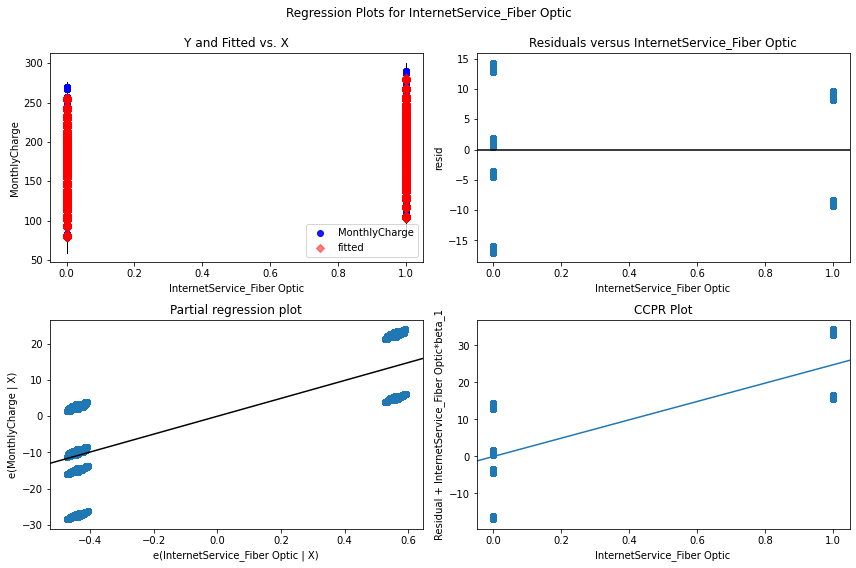

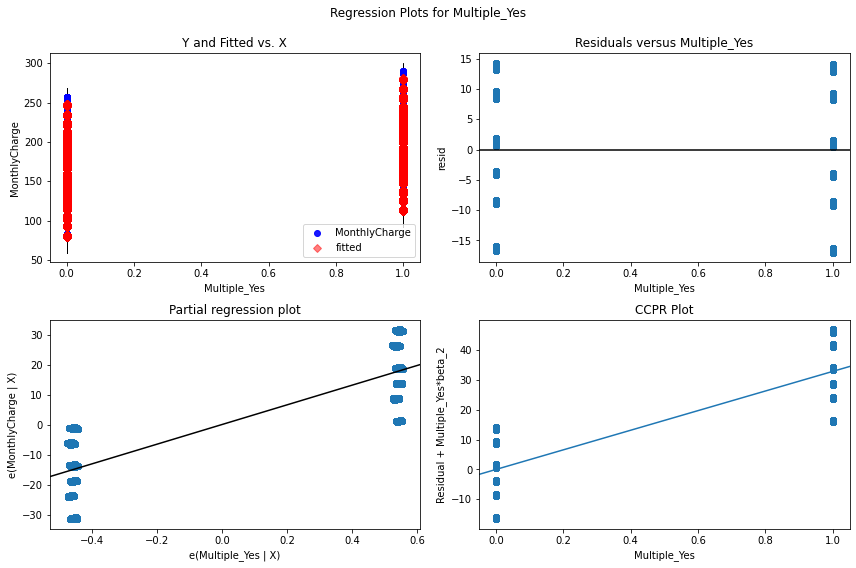

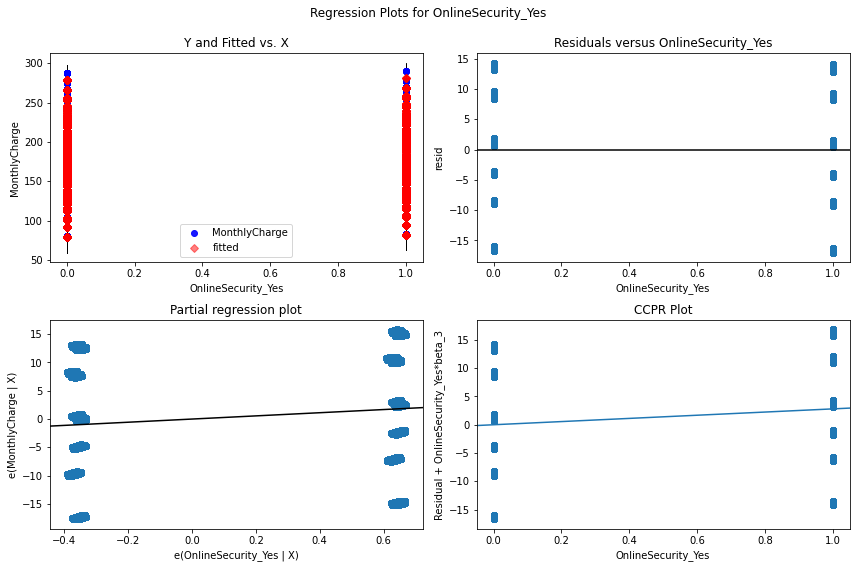

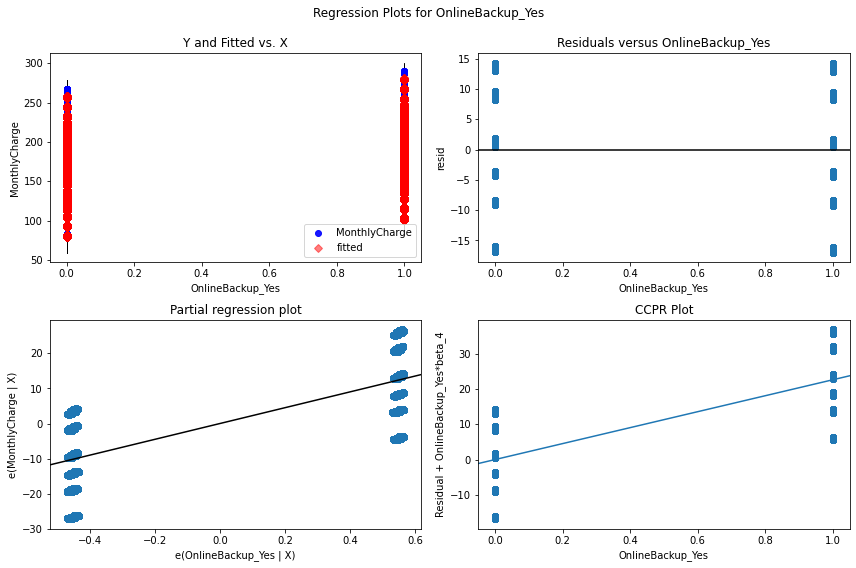

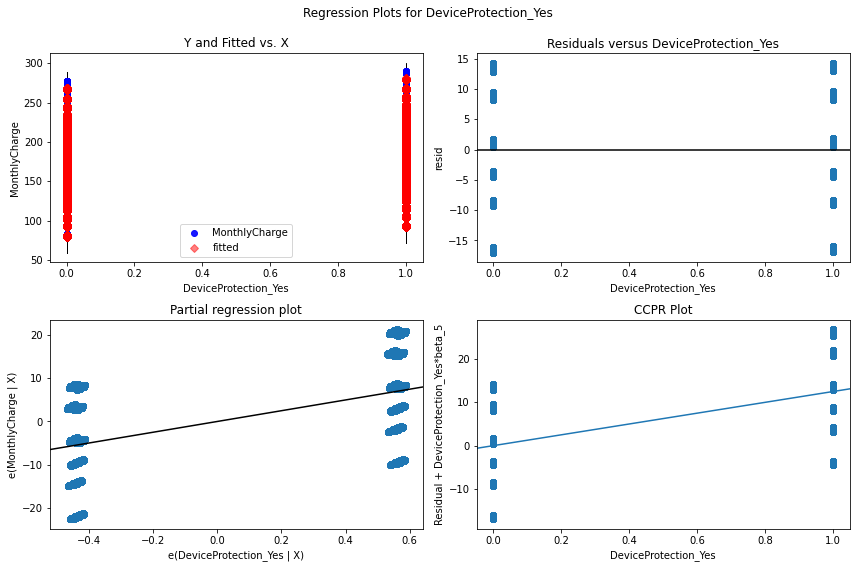

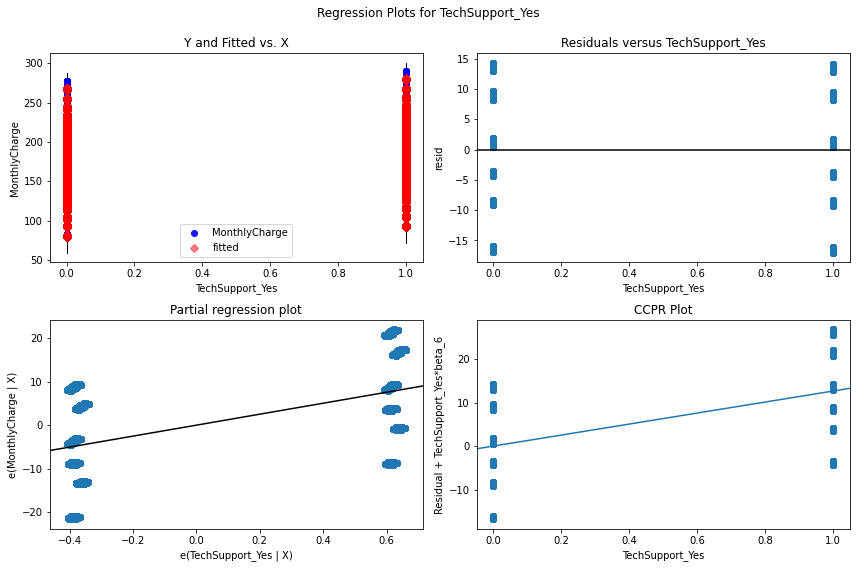

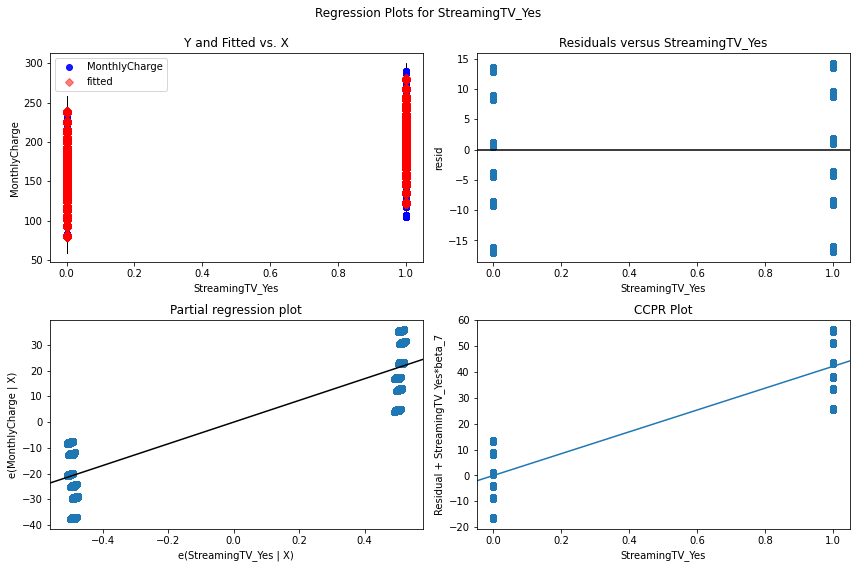

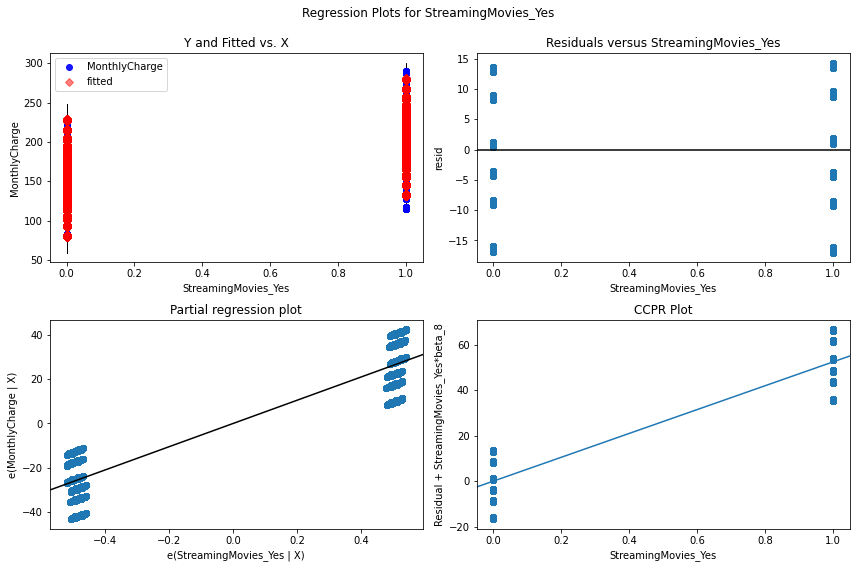

In [35]:
#create residual plots for all of the model's final predictor variables
for c in X.columns:
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_regress_exog(model_3, c, fig=fig)

<div class="impact" data-hdr="Multivariate Normality">We can see that in each of the residual plots, the values are randomly distributed above and below the zero line. This is an indication of multivariate normality, which is to say that the residuals are normally distributed.</div>

<h2 data-nbr="E2">Output and Calculations</h2>

<div class="quote"><div class="impact" data-hdr="2">Provide the output and any calculations of the analysis you performed, including the model’s residual error. Note: The output should include the predictions from the refined model you used to perform the analysis. </div></div>

<div class="impact" data-hdr="Output and Calculations">All of the output and calculations are contained within this Jupyter notebook.</div>

<h2 data-nbr="E3">Provide Code</h2>

<div class="quote"><div class="impact" data-hdr="3">Provide the code used to support the implementation of the multiple regression models. </div></div>


<div class="impact" data-hdr="Code">All of the code, calculations and output are contained within this Jupyter notebook.</div>

<div class="part">Data Summary and Implications</div>

<div class="quote"><div class="impact" data-hdr="F">Summarize your findings and assumptions by doing the following:</div></div>

<h2 data-nbr="F1">Final Results</h2>

<div class="quote"><div class="impact" data-hdr="1">Discuss the results of your data analysis, including the following elements:
•  a regression equation for the reduced model
•  an interpretation of coefficients of the statistically significant variables of the model
•  the statistical and practical significance of the model
•  the limitations of the data analysis
</div></div>

<div class="impact" data-hdr="Final Regression Equation">The model is complete. Here is the final regression equation. And, as I predicted, the final model is based on the customer's services. All of the other variables that we started with have been eliminated because of high p-values or high multi-collinearity with other variables.</div>

In [36]:
# equation of the regression line/plane
print('Adj. R-squared: {}'.format(model_3.summary2().tables[0][3][0]))
equation = model_3.summary2().tables[1]
print('Estimate [{}] as y = '.format(model_3.summary2().tables[0][1][1]))
for i in equation.itertuples():
    print('   {:+.2f} x ( {} ) '.format(i[1],i[0]))

Adj. R-squared: 0.946
Estimate [MonthlyCharge] as y = 
   +78.84 x ( const ) 
   +24.74 x ( InternetService_Fiber Optic ) 
   +32.80 x ( Multiple_Yes ) 
   +2.80 x ( OnlineSecurity_Yes ) 
   +22.58 x ( OnlineBackup_Yes ) 
   +12.46 x ( DeviceProtection_Yes ) 
   +12.64 x ( TechSupport_Yes ) 
   +42.18 x ( StreamingTV_Yes ) 
   +52.34 x ( StreamingMovies_Yes ) 


The final model uses eight (8) predictor variables and has an R-squared value of 94.6% and a condition number of 5 which indicate that this is a pretty good model.

<div class="impact" data-hdr="Interpretation of Coefficients">Because the final regression model is based on categorical data, yes and no values, then each of the cooefficients has the behaviour of adding a given value if yes, or adding zero (0) if no. For example, if the customer only has fiber optic service and nothing else, then you could acurately predict the monthly charge by adding the constant value of 78.84 to the cooefficient value of 24.74 which equals $103.58 in this case.</div>

<div class="impact" data-hdr="Limitations of the Data">Limitations of the data_______</div>

<h2 data-nbr="F2">Recommendations</h2>

<div class="quote"><div class="impact" data-hdr="2">Recommend a course of action based on your results.</div></div>

<div class="impact" data-hdr="Recommendations">Recommend using the model to (1) predict economic value for a given customer based on the number of services and (2) consider offering discounts or rebates to customers who are paying more than an average monthly charge.</div>

<div class="part">Demonstration</div>

<h2 data-nbr="G">Video</h2>

<div class="quote"><div class="impact" data-hdr="G">Provide a Panopto video recording that includes all of the following elements:
•  a demonstration of the functionality of the code used for the analysis
•  an identification of the version of the programming environment
•  a comparison of the two multiple regression models you used in your analysis
•  an interpretation of the coefficients.
</div></div>

<div class="impact" data-hdr="Video">Video created and the .mp4 file is attached to submission. Also, the video is published on the school's Panopto website in the 'D208' dropbox at https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3721d93d-5d6c-445b-b244-ada2012c96b2.</div>

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=3721d93d-5d6c-445b-b244-ada2012c96b2

<h2 data-nbr="H">Reference</h2>

<div class="quote"><div class="impact" data-hdr="H">List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.</div></div>

<div class="apa" data-author="Agarwal, A." data-date="2021, September" data-url="https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155">Linear Regression on Boston Housing Dataset</div>

<div class="apa" data-author="Bari, A., Chaouchi, M., & Jung, T." data-date="2021, August" data-url="https://www.dummies.com/programming/big-data/data-science/how-to-list-business-objectives-for-predictive-analytics/">How to List Business Objectives for Predictive Analytics</div>

<div class="apa" data-author="Geeks For Geeks" data-date="2021, May" data-url="https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/">How to Drop One or Multiple Columns in Pandas Dataframe</div>

<div class="apa" data-author="Massaron, L., Boschetti, A." data-date="2016" data-url="https://www.packtpub.com/product/regression-analysis-with-python/9781785286315">Regression Analysis with Python</div>

<h2 data-nbr="I">Sources</h2>

<div class="quote"><div class="impact" data-hdr="I">Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.</div></div>

<div class="apa" data-author="Massaron, L., Boschetti, A." data-date="2016" data-url="https://www.packtpub.com/product/regression-analysis-with-python/9781785286315">Regression Analysis with Python</div>

<div class="apa" data-author="Sarkar, T." data-date="2019, June 5" data-url="https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685">How do you check the quality of your regression model in Python</div>

<h2 data-nbr="J">Professional</h2>

<div class="quote"><div class="impact" data-hdr="J">Demonstrate professional communication in the content and presentation of your submission.</div></div>